# 4. Mushroom foraging

The [mushroom dataset](https://www.kaggle.com/datasets/dhinaharp/mushroom-dataset) contains data about approximately 60000 mushrooms, and your task is to classify them as either edible or poisonous. You can read about the features [here](https://www.kaggle.com/datasets/uciml/mushroom-classification) and import the data using:

In [3]:
import pandas as pd

df = pd.read_csv('secondary_data.csv', delimiter = ';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


It's up to you how you approach this data, but at a minimum, your analysis should include:

* Informed **data preparation**.
* 2 different classification models, one of which must be **logistic regression**.
* A discussion of which **performance metric** is most relevant for the evaluation of your models.
* 2 different **validation methodologies** used to tune hyperparameters.
* **Confusion matrices** for your models, and associated comments.

In [4]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
missing_percentage

veil-type               94.797688
spore-print-color       89.595376
veil-color              87.861272
stem-root               84.393064
stem-surface            62.427746
gill-spacing            41.040462
cap-surface             23.121387
gill-attachment         16.184971
ring-type                4.046243
class                    0.000000
stem-color               0.000000
habitat                  0.000000
has-ring                 0.000000
stem-width               0.000000
cap-diameter             0.000000
stem-height              0.000000
gill-color               0.000000
does-bruise-or-bleed     0.000000
cap-color                0.000000
cap-shape                0.000000
season                   0.000000
dtype: float64

In [5]:
# Drop columns with more than 20% missing values
columns_to_drop = [
    'veil-type',
    'spore-print-color',
    'veil-color',
    'stem-root',
    'stem-surface',
    'gill-spacing',
    'cap-surface'
]

data = df.drop(columns=columns_to_drop)

data.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')

In [6]:
# Fill missing values in the remaining columns with the mode of each column
columns_to_fill = ['gill-attachment', 'ring-type']

for col in columns_to_fill:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

C:\Users\emanu\AppData\Local\Temp\ipykernel_16036\3839772400.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['cap-diameter', 'stem-height', 'stem-width']

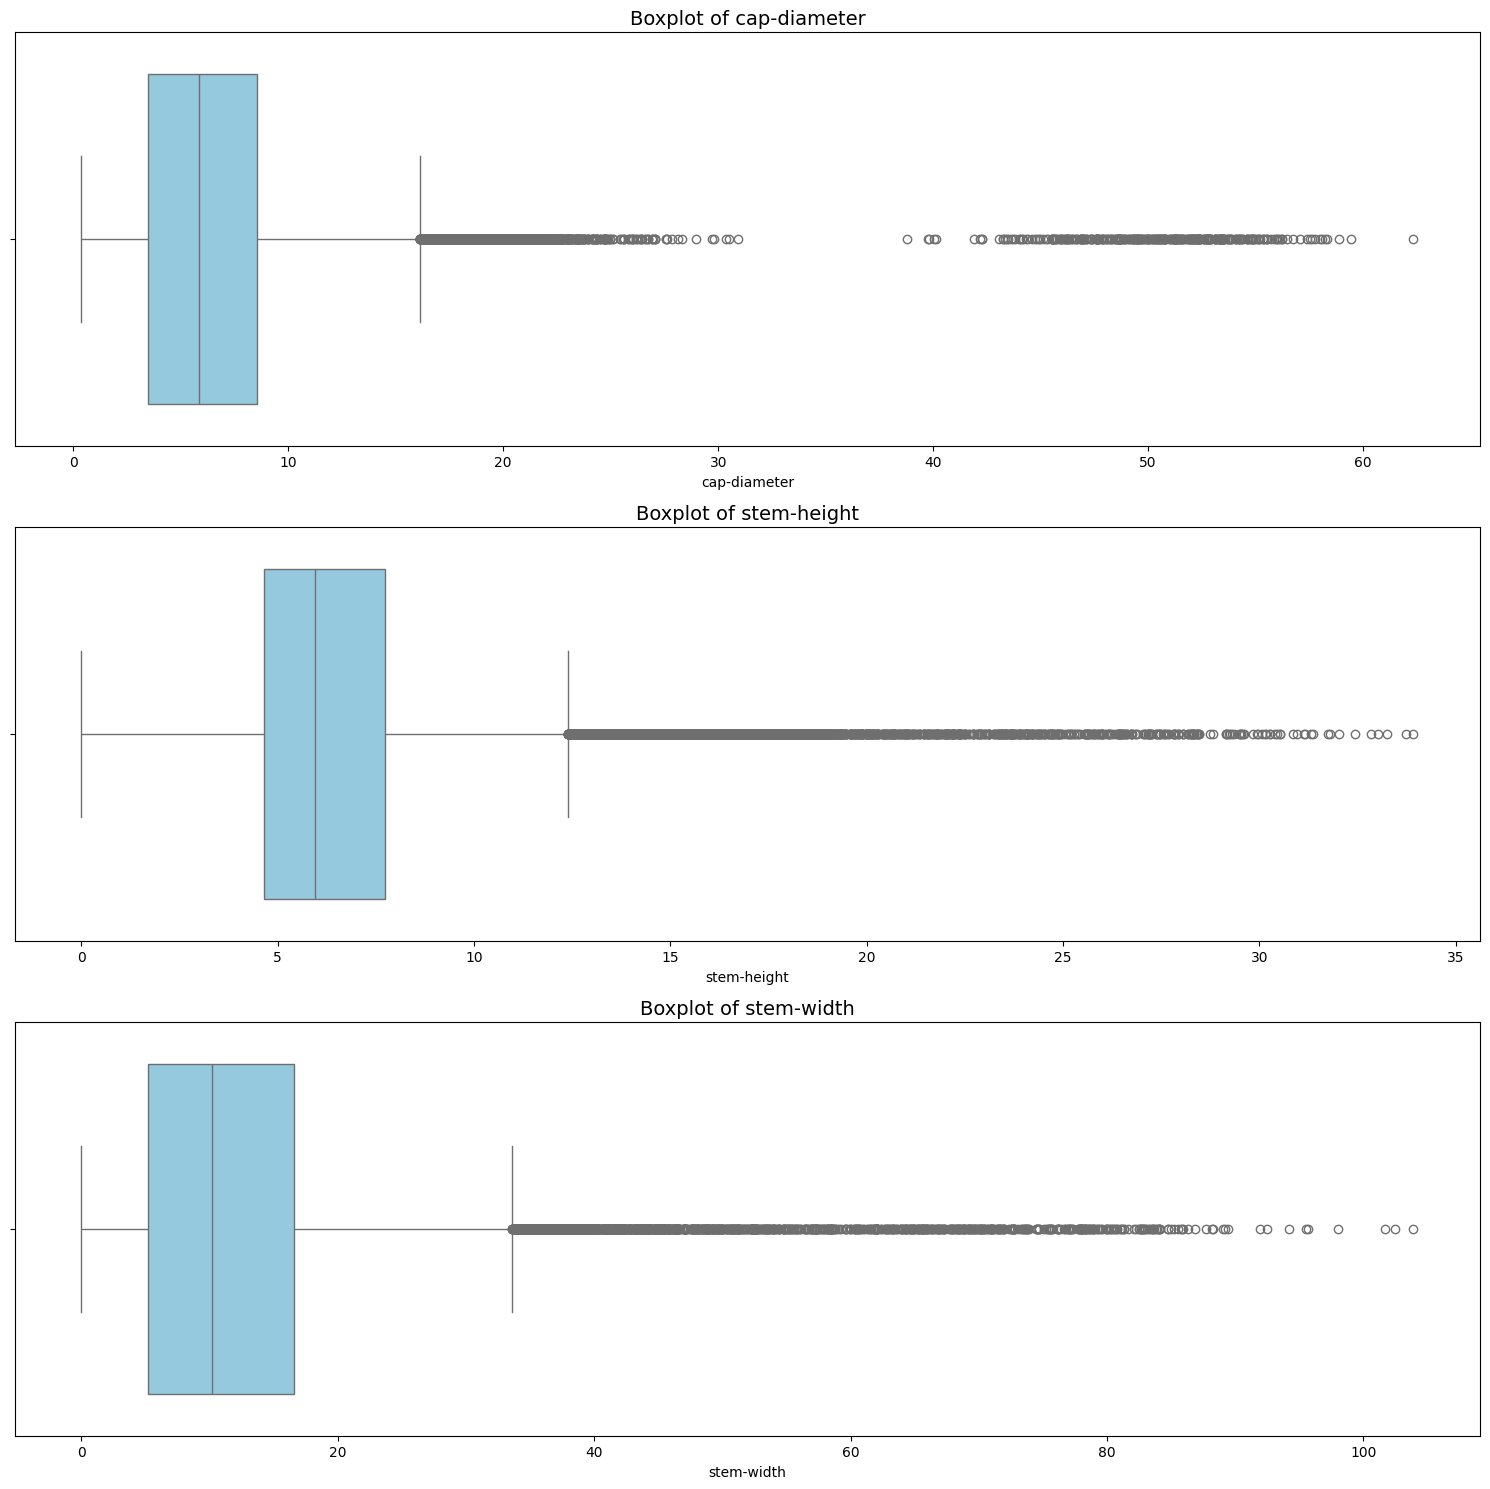

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify numeric columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Set up the plotting area
plt.figure(figsize=(15, 5 * len(numerical_cols)))

# Loop through numeric columns and create a boxplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Dictionary to store outlier info
outliers_info = {}

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_info[col] = {
        'num_outliers': outliers.shape[0],
        'percent_outliers': round(100 * outliers.shape[0] / data.shape[0], 2),
        'lower_bound': round(lower_bound, 2),
        'upper_bound': round(upper_bound, 2)
    }

# Display outlier summary
for col, info in outliers_info.items():
    print(f"{col}: {info['num_outliers']} outliers "
          f"({info['percent_outliers']}%), "
          f"bounds = [{info['lower_bound']}, {info['upper_bound']}]")

cap-diameter: 2400 outliers (3.93%), bounds = [-4.11, 16.13]
stem-height: 3169 outliers (5.19%), bounds = [-0.01, 12.39]
stem-width: 1967 outliers (3.22%), bounds = [-11.83, 33.61]


In [ ]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Dropping outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
353,p,6.87,x,n,f,e,w,6.88,13.64,w,t,p,d,a
354,p,8.59,p,n,f,e,w,9.15,17.34,w,t,p,d,a
355,p,5.95,p,n,f,e,w,7.54,12.73,w,t,p,d,u
356,p,6.51,x,n,f,e,w,6.80,12.92,w,t,p,d,a
357,p,7.66,x,n,f,e,w,8.55,14.98,w,t,p,d,a


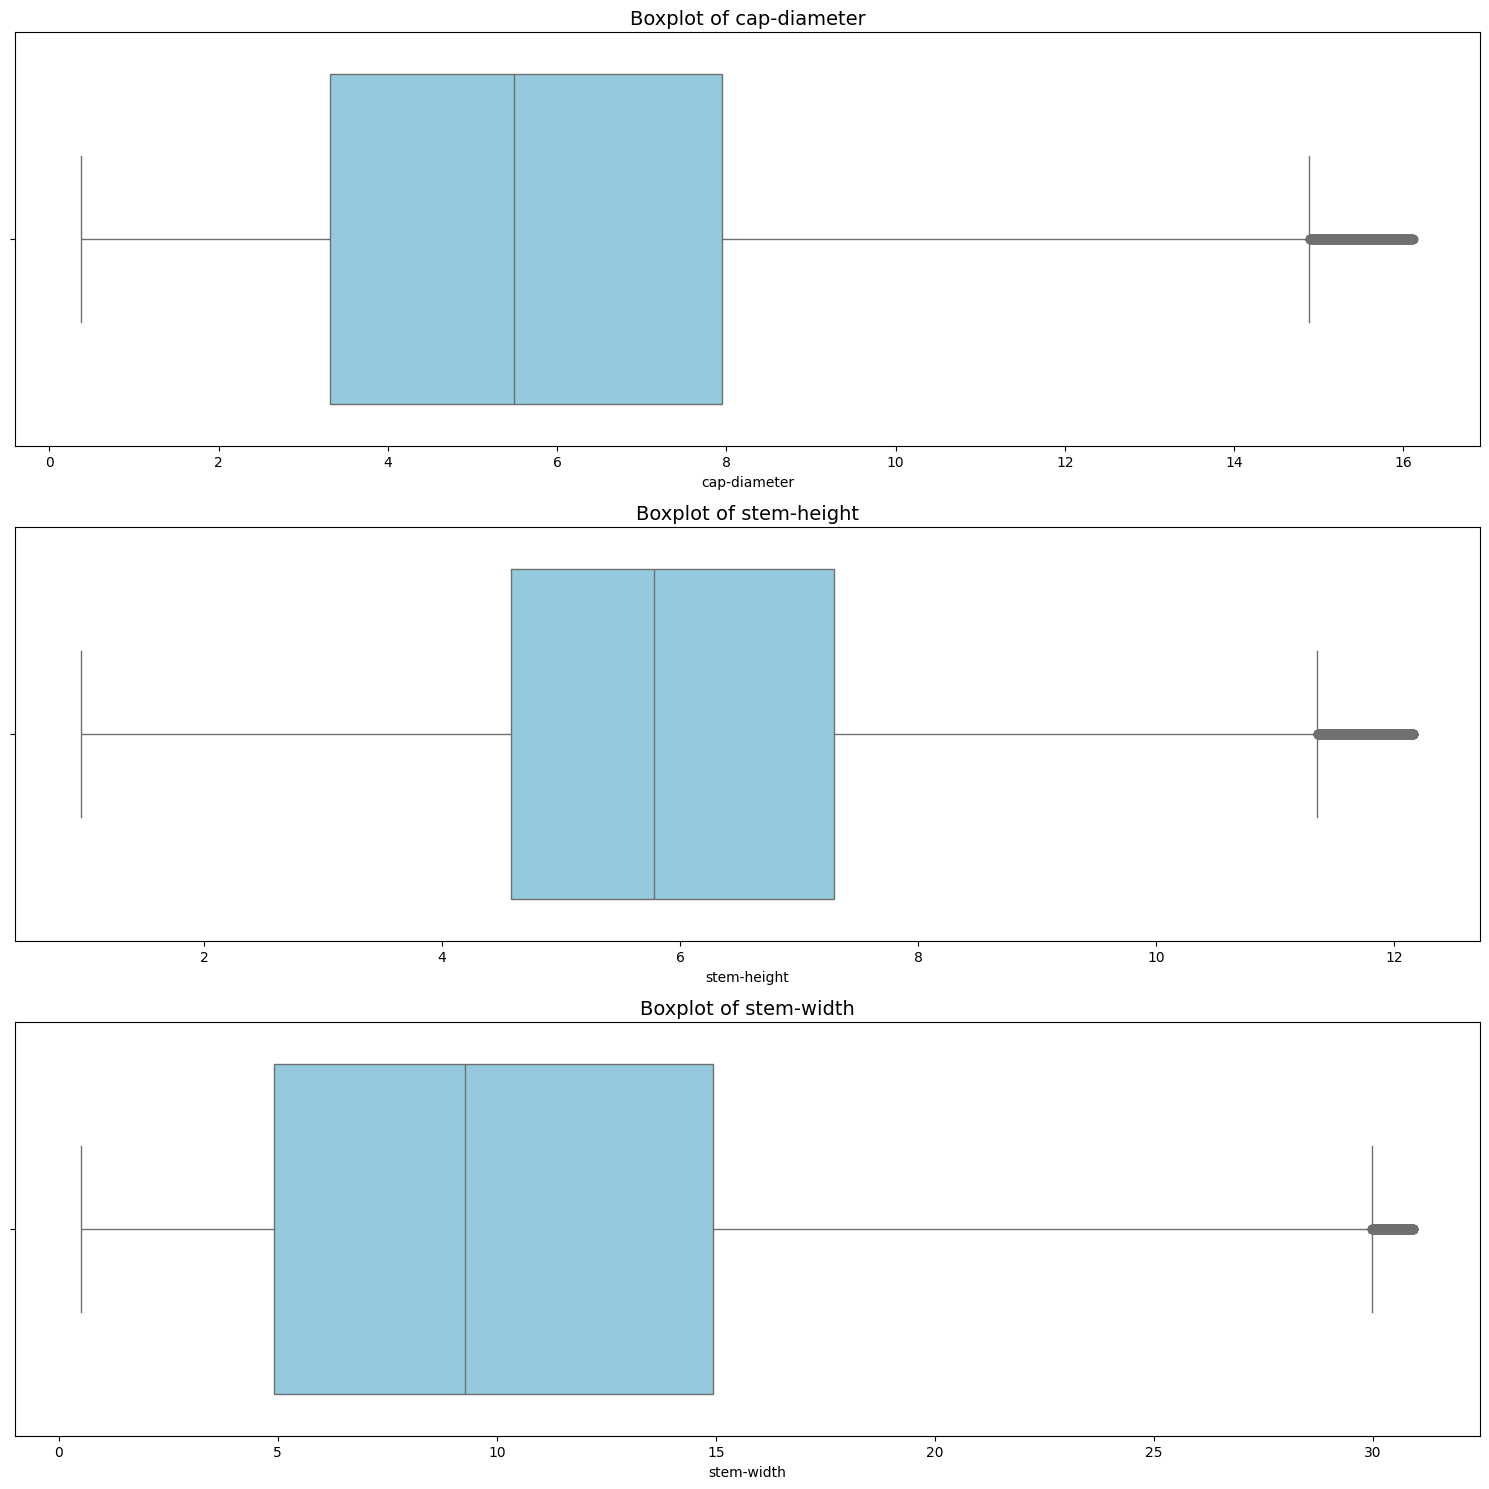

In [ ]:
# Set up the plotting area
plt.figure(figsize=(15, 5 * len(numerical_cols)))

# Loop through numeric columns and create a boxplot for each to check if they were deleted
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Select the columns you want to scale
columns_to_scale = ['cap-diameter', 'stem-height', 'stem-width']

# Step 2: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Fit and transform the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Verify the scaling by displaying the first few rows
data[columns_to_scale].head()

,cap-diameter,stem-height,stem-width
353,0.412325,0.528150,0.431579
354,0.521601,0.731010,0.553289
355,0.353875,0.587131,0.401645
356,0.389454,0.521001,0.407895
357,0.462516,0.677391,0.475658


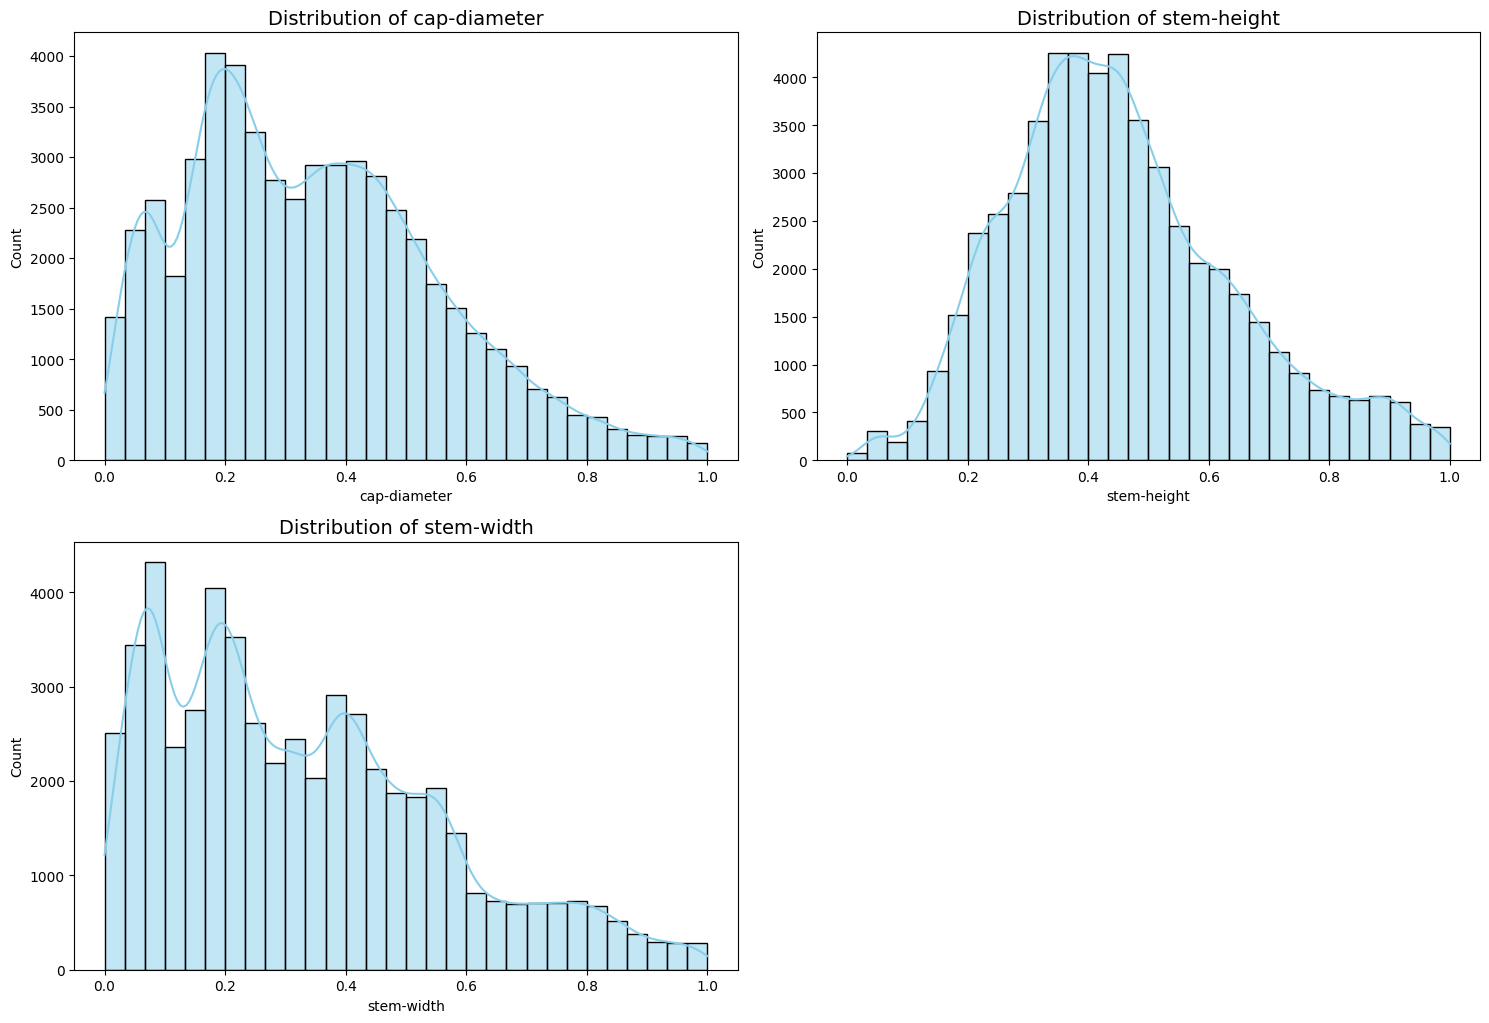

In [ ]:
# Set up the plotting area
plt.figure(figsize=(15, 5 * len(numerical_cols)))

# Loop through numeric columns and create histograms with KDE
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


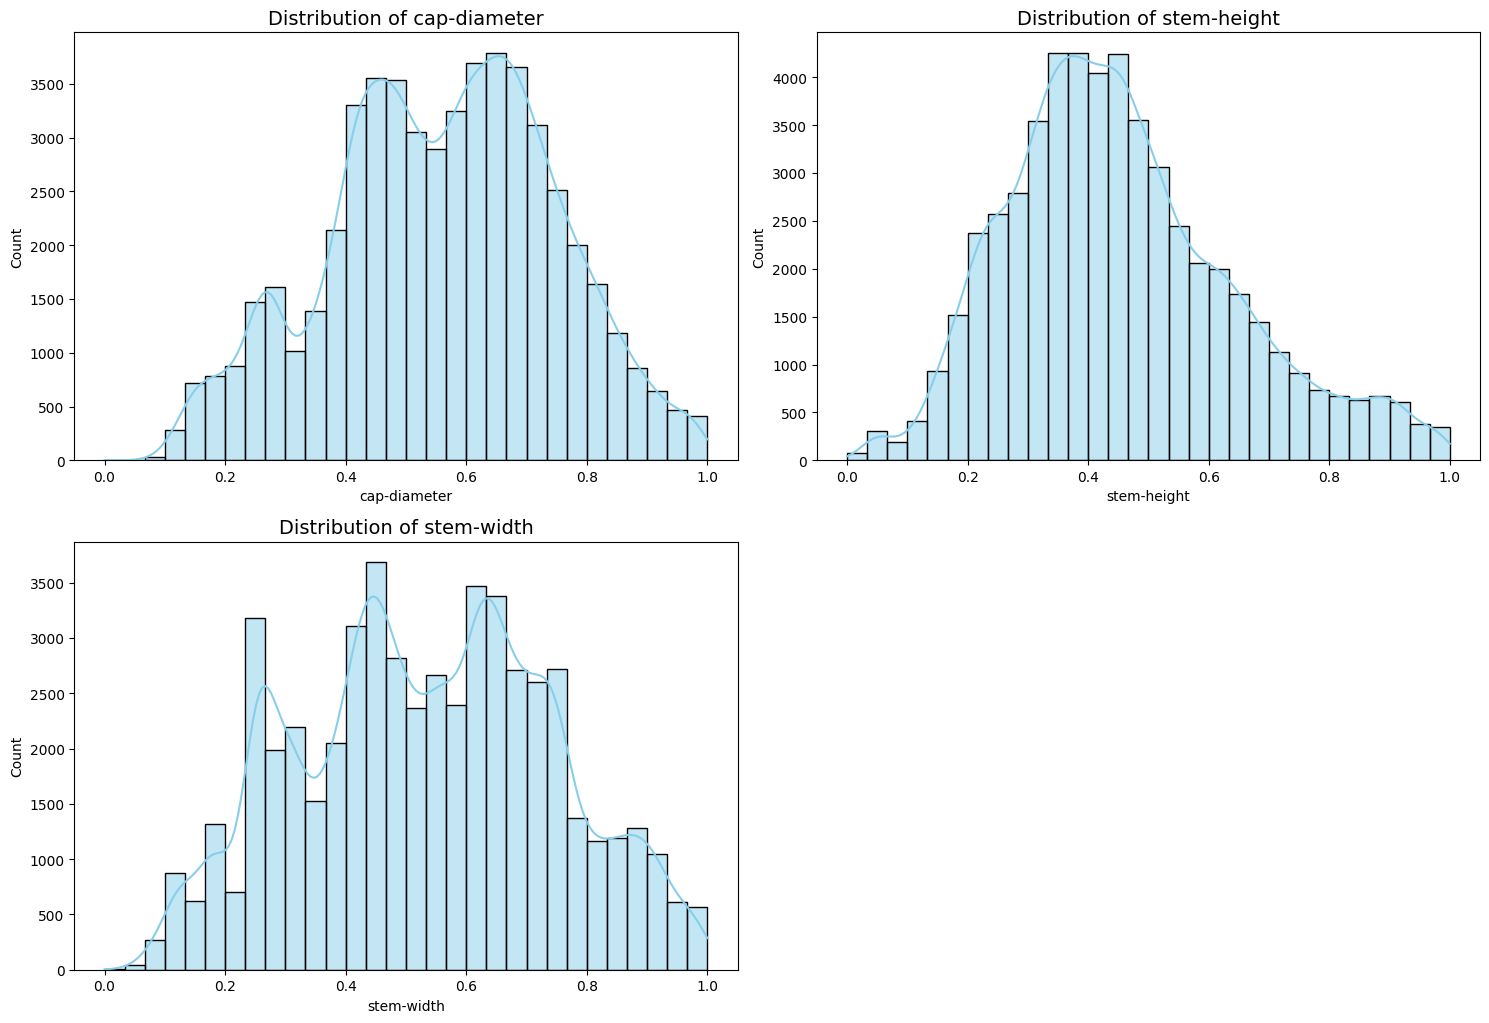

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
353,p,0.642126,x,n,f,e,w,0.528150,0.656947,w,t,p,d,a
354,p,0.722220,p,n,f,e,w,0.731010,0.743834,w,t,p,d,a
355,p,0.594874,p,n,f,e,w,0.587131,0.633754,w,t,p,d,u
356,p,0.624062,x,n,f,e,w,0.521001,0.638666,w,t,p,d,a
357,p,0.680085,x,n,f,e,w,0.677391,0.689680,w,t,p,d,a


In [ ]:
# Apply log transformation to 'cap-diameter' and 'stem-width' columns
# data['cap-diameter'] = np.log1p(data['cap-diameter'])  # log1p handles log(0) case
data['cap-diameter'] = np.sqrt(data['cap-diameter'])
data['stem-width'] = np.sqrt(data['stem-width'])

# Set up the plotting area for the transformed columns
plt.figure(figsize=(15, 5 * len(numerical_cols)))

# Loop through numeric columns and create histograms with KDE
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

data.head()

In [ ]:
# Perform one-hot encoding on categorical columns
data = pd.get_dummies(data, drop_first=True)

# Convert only the boolean columns to 1 and 0
bool_columns = data.select_dtypes(include=['bool']).columns
data[bool_columns] = data[bool_columns].astype(int)

data.head()

,cap-diameter,stem-height,stem-width,class_p,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,does-bruise-or-bleed_t,gill-attachment_d,gill-attachment_e,gill-attachment_f,gill-attachment_p,gill-attachment_s,gill-attachment_x,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stem-color_e,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y,has-ring_t,ring-type_f,ring-type_g,ring-type_l,ring-type_p,ring-type_r,ring-type_z,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_s,season_u,season_w
353,0.642126,0.528150,0.656947,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
354,0.722220,0.731010,0.743834,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
355,0.594874,0.587131,0.633754,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
356,0.624062,0.521001,0.638666,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
357,0.680085,0.677391,0.689680,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'data_encoded' with your features and labels
# Separate the features (X) and the target variable (y)

X = data.drop(columns=['class_p'])  # Features
y = data['class_p']  # Target variable

# Step 1: Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the training set further into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

log_reg = LogisticRegression(C=10, random_state=504, max_iter=200)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy_train = log_reg.score(X_train, y_train)
accuracy_test = log_reg.score(X_test, y_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Training Accuracy: 0.7793
Test Accuracy: 0.7748
Precision: 0.8016
Recall: 0.7848


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# For a mushroom classification task where we are predicting whether a mushroom is poisonous or edible, 
# recall is more important due to the potential danger of missing a poisonous mushroom.

# Hyperparameter tuning for 'C' using validation set
best_C = 0
best_val_recall = 0

# Try a range of 'C' values from 1 to 200 (inclusive)
for C in range(1, 201):
    log_reg = LogisticRegression(C=C, random_state=504, max_iter=200)
    log_reg.fit(X_train, y_train)

    # We are tuning hyperparameter C based on the best achieved recall on the validation set
    y_pred_val = log_reg.predict(X_val)  # Use validation set for tuning
    val_recall = recall_score(y_val, y_pred_val)  # Use validation labels

    if val_recall > best_val_recall:
        best_val_recall = val_recall
        best_C = C

# Now train the model with the best hyperparameter on the full training data
log_reg = LogisticRegression(C=best_C, random_state=504, max_iter=200)
log_reg.fit(X_train, y_train)

# Evaluate on the test set
y_pred = log_reg.predict(X_test)

# Calculate metrics
accuracy_train = log_reg.score(X_train, y_train)
accuracy_test = log_reg.score(X_test, y_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Best C: {best_C}")
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Best C: 116
Training Accuracy: 0.7802
Test Accuracy: 0.7751
Precision: 0.8009
Recall: 0.7868


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Create a Logistic Regression model
log_reg = LogisticRegression(random_state=504, max_iter=200)

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 0.5, 0.75 , 1, 5, 10, 15, 20, 25, 40, 50, 75, 80, 100],            # Regularization strength
}

# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='recall')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_model = grid_search.best_estimator_

# Print the best hyperparameters and the best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Recall: {grid_search.best_score_:.4f}")

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate Precision and Recall for the test set
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the Precision and Recall
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Best Hyperparameters: {'C': 0.1}
Best Cross-Validation Recall: 0.7913
Precision: 0.8003
Recall: 0.7860


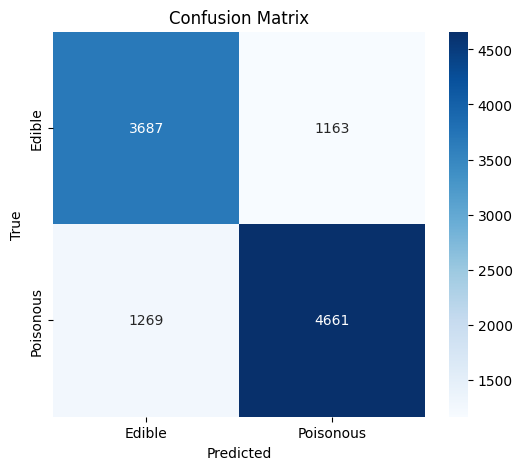

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Calculate max_depth as sqrt of number of features
num_features = X_train.shape[1]
calculated_max_depth = round(np.sqrt(num_features))

rf_model = RandomForestClassifier(n_estimators=50, max_depth=calculated_max_depth, random_state=504)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_train_rf = rf_model.score(X_train, y_train)
accuracy_test_rf = rf_model.score(X_test, y_test)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f"Random Forest Training Accuracy: {accuracy_train_rf:.4f}")
print(f"Random Forest Test Accuracy: {accuracy_test_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")


Random Forest Training Accuracy: 0.9187
Random Forest Test Accuracy: 0.9092
Random Forest Precision: 0.9026
Random Forest Recall: 0.9359


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Feature-based max depth range
num_features = X_train.shape[1]
max_depth_range = range(2, 8)
max_number_features = round(np.sqrt(num_features))

# Estimators range (e.g., 10 to 200 with step 10)
n_estimators_range = range(10, 201, 10)

best_depth = 0
best_n_estimators = 0
best_val_recall = 0

# Grid search over both parameters
for depth in max_depth_range:
    for n in n_estimators_range:
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=depth, max_features = max_number_features, random_state=504)
        rf_model.fit(X_train, y_train)

        # Use validation set for tuning, not the test set
        y_pred_val = rf_model.predict(X_val)
        val_recall = recall_score(y_val, y_pred_val)

        if val_recall > best_val_recall:
            best_val_recall = val_recall
            best_depth = depth
            best_n_estimators = n

# Train final model with best params
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_depth, random_state=504)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_train_rf = rf_model.score(X_train, y_train)
accuracy_test_rf = rf_model.score(X_test, y_test)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f"Best max_depth: {best_depth}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Random Forest Training Accuracy: {accuracy_train_rf:.4f}")
print(f"Random Forest Test Accuracy: {accuracy_test_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")


Best max_depth: 7
Best n_estimators: 50
Random Forest Training Accuracy: 0.8984
Random Forest Test Accuracy: 0.8917
Random Forest Precision: 0.8838
Random Forest Recall: 0.9248


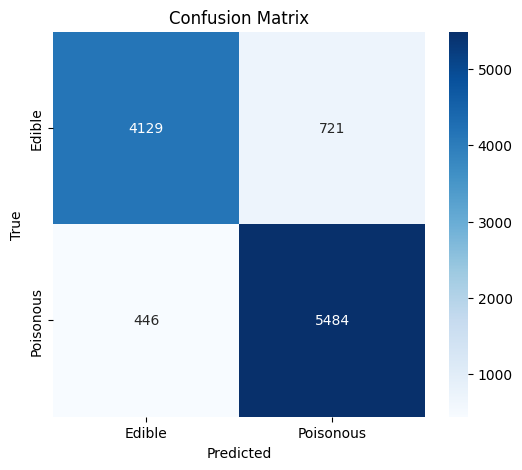

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()